In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import csv
import json
import requests
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
# Import ems data from csv
ems_df = pd.read_csv("EMS_DATA.csv")
ems_df = ems_df.rename(columns={"GROUP_DATE":"Date"})
ems_df['DATETIME']= pd.to_datetime(ems_df['Date'])
ems_df= ems_df.astype({'DATETIME': 'datetime64'})
ems_df['Date']= ems_df['DATETIME'].dt.strftime("%Y/%m/%d")
ems_df.head()

,Date,INCIDENT_DATETIME,INITIAL_SEVERITY_LEVEL_CODE,DATETIME
0,2016/01/01,4879,4.139373,2016-01-01
1,2017/01/01,4928,4.196226,2017-01-01
2,2018/01/01,4653,4.137975,2018-01-01
3,2016/01/02,3439,4.165455,2016-01-02
4,2017/01/02,3685,4.181818,2017-01-02


In [4]:
# Import moon data from csv
moon_df = pd.read_csv("Moon_Data.csv")
del moon_df["Unnamed: 0"]
moon_df.head()

,Date,Phase
0,1/2/2016,Last Quarter
1,1/10/2016,New Moon
2,1/16/2016,First Quarter
3,1/24/2016,Full Moon
4,2/1/2016,Last Quarter


In [5]:
# Change the date to a datetime object
moon_df['DATETIME']= pd.to_datetime(moon_df['Date'])
moon_df= moon_df.astype({'DATETIME': 'datetime64'})
moon_df['Date']= moon_df['DATETIME'].dt.strftime("%Y/%m/%d")
moon_df.head()

,Date,Phase,DATETIME
0,2016/01/02,Last Quarter,2016-01-02
1,2016/01/10,New Moon,2016-01-10
2,2016/01/16,First Quarter,2016-01-16
3,2016/01/24,Full Moon,2016-01-24
4,2016/02/01,Last Quarter,2016-02-01


In [6]:
# Merge tables
darkside = pd.merge(ems_df, moon_df, on="Date", how="left")

#Clean up table
darkside = darkside.rename(columns={"INITIAL_SEVERITY_LEVEL_CODE":"Avg. Initial Severity Level", "INCIDENT_DATETIME":"Incident Count"})
darkside.head()

,Date,Incident Count,Avg. Initial Severity Level,DATETIME_x,Phase,DATETIME_y
0,2016/01/01,4879,4.139373,2016-01-01,NaN,NaT
1,2017/01/01,4928,4.196226,2017-01-01,NaN,NaT
2,2018/01/01,4653,4.137975,2018-01-01,NaN,NaT
3,2016/01/02,3439,4.165455,2016-01-02,Last Quarter,2016-01-02
4,2017/01/02,3685,4.181818,2017-01-02,NaN,NaT


In [7]:
#calculate the percentage of severity level by phases of moon
#phase_percentage = darkside.groupy(["Moon Phase"]).sum()["Incident Count"] / darkside["Inci"]

In [8]:
#darkside['full_moon'] = np.where(darkside['Phase']=='Full Moon', 1, 0)
#darkside.drop('DATETIME', axis=1, inplace=True)
#darkside.drop('GROUP_DATE', axis=1, inplace=True)
#darkside.head()

<IPython.core.display.Javascript object>


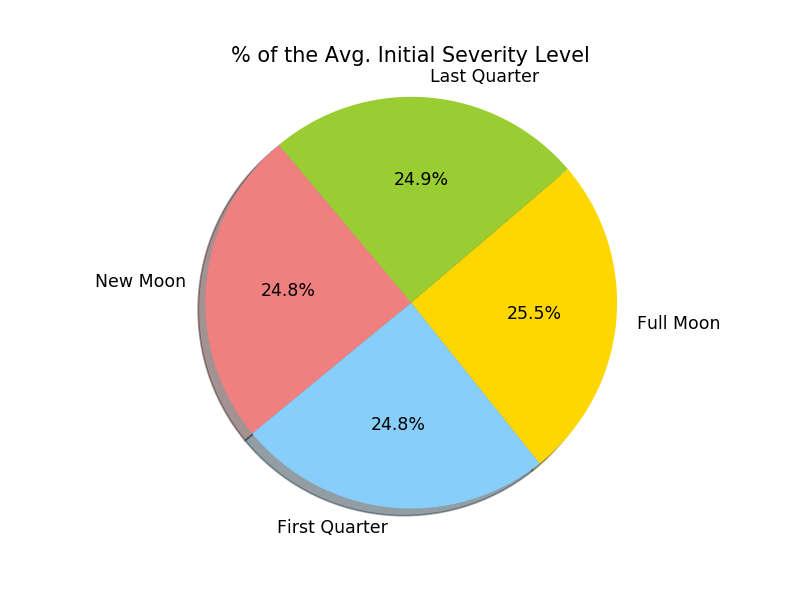

In [12]:
#calculate the percentage of severity level by phases of moon
phase_percentage = darkside.groupby(["Phase"]).sum()["Avg. Initial Severity Level"] / darkside["Avg. Initial Severity Level"].sum() * 100

#building a pie chart
plt.pie(phase_percentage,
        labels =["New Moon", "First Quarter", "Full Moon", "Last Quarter"],
        colors = ["lightcoral", "lightskyblue", "gold", "yellowgreen"],
        autopct = "%1.1f%%",
        explode = [0, 0, 0, 0],
        shadow = True,
        startangle = 130)

plt.title("% of the Avg. Initial Severity Level")
    
plt.axis("equal")

plt.show()
        

In [13]:
plt.savefig("% _of_the_Avg_v_Initial_Severity_Level_plot.png")